In [1]:
import os
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [6]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [8]:
bitcoin_news_en["totalResults"]

4397

In [9]:
ethereum_news_en["totalResults"]

946

In [10]:
# Create a function that generate a news DataFrame
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [12]:
# Create the Bitcoin news DataFrame
bitcoin_news_df = create_df(bitcoin_news_en["articles"])
bitcoin_news_df

,date,description,text,title
0,2020-07-17T19:30:40Z,"On Wednesday, July 15, Twitter was the target ...",Just hackers burning up 0day like it’s a fire ...,Twitter's Bitcoin hackers had almost limitless...
1,2020-07-16T20:24:47Z,Author’s note: This story was first published ...,Most of these accounts tweeted some variant of...,Everything we know about the Twitter Bitcoin hack
2,2020-07-16T21:08:19Z,The FBI has confirmed that it’s investigating ...,Reuters had previously reported the FBI would ...,The FBI is investigating the Twitter Bitcoin hack
3,2020-07-18T04:14:10Z,Ever since Wednesday’s “bitcoin scam” hack whe...,Our investigation and cooperation with law enf...,Twitter confirms 'Bitcoin' hackers copied the ...
4,2020-07-16T22:42:57Z,Hackers managed to hijack official accounts of...,Image copyrightAFP/REUTERSImage caption\r\n Ki...,Twitter hack: FBI investigates major attack
5,2020-07-15T20:34:54Z,A number of high-profile cryptocurrency Twitte...,A number of high-profile Twitter accounts were...,Many popular Twitter accounts simultaneously h...
6,2020-06-25T04:30:00Z,TL;DR: The Complete Cryptocurrency Investment ...,TL;DR: The Complete Cryptocurrency Investment ...,Learn how to invest in cryptocurrencies with t...
7,2020-07-16T13:30:00Z,A gigantic breach of Twitter’s security yester...,A gigantic breach of Twitters security yesterd...,It's Time to Rethink How You Use Twitter
8,2020-07-18T07:57:25Z,"The firm says it is ""embarrassed and sorry"" fo...",Image copyrightReuters / AFP\r\nTwitter says h...,Twitter hackers manipulated staff to access in...
9,2020-06-23T08:48:47Z,"Sparrow Exchange, a Bitcoin and Ethereum optio...","Sparrow Exchange, a Bitcoin and Ethereum optio...",Singapore-based options trading platform Sparr...


In [13]:
# Create the Ethereum news DataFrame
ethereum_news_df = create_df(ethereum_news_en["articles"])
ethereum_news_df

,date,description,text,title
0,2020-06-23T08:48:47Z,"Sparrow Exchange, a Bitcoin and Ethereum optio...","Sparrow Exchange, a Bitcoin and Ethereum optio...",Singapore-based options trading platform Sparr...
1,2020-06-25T04:30:00Z,TL;DR: The Complete Cryptocurrency Investment ...,TL;DR: The Complete Cryptocurrency Investment ...,Learn how to invest in cryptocurrencies with t...
2,2020-06-22T16:23:08Z,Peer-to-peer micropayments for torrenting. Bui...,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",Show HN: Web3Torrent – Adding Ethereum Micropa...
3,2020-07-01T15:00:17Z,"When the inventor of AWS Lambda, Tim Wagner, a...","When the inventor of AWS Lambda, Tim Wagner, a...",Vendia raises $5.1M for its multi-cloud server...
4,2020-06-23T09:10:00Z,Robert Stevens / Decrypt:\nThe Celsius Network...,None,"The Celsius Network, a DeFi lending platform t..."
5,2020-07-07T00:35:01Z,Alexander Behrens / Decrypt:\nReport: Active u...,None,Report: Active users on Ethereum-based dapps d...
6,2020-06-23T19:33:36Z,I was perusing the crypto markets today and no...,I was perusing the crypto markets today and no...,Stablecoin Adoption
7,2020-06-22T16:45:01Z,Yogita Khatri / The Block:\nThailand-based SYN...,None,"Thailand-based SYNQA, the parent company of Et..."
8,2020-07-09T13:30:00Z,"Nikhilesh De / CoinDesk:\nIn a first, the CENT...",None,"In a first, the CENTRE Consortium has blacklis..."
9,2020-07-14T08:19:54Z,"Ethereum, the second most valuable cryptocurre...",Interest in bitcoin and other cryptocurrencies...,Ethereum Is Beating Bitcoin In More Ways Than One


In [14]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [16]:
bitcoin_sentiments = []
for articles in bitcoin_news_en["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc  = pd.DataFrame(bitcoin_sentiments)
btc

,Compound,Negative,Neutral,Positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
2,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...
5,-0.8689,0.277,0.687,0.036,A number of high-profile Twitter accounts were...
6,0.0000,0.000,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...
7,-0.7003,0.191,0.745,0.064,A gigantic breach of Twitters security yesterd...
8,-0.3818,0.085,0.915,0.000,Image copyrightReuters / AFP\r\nTwitter says h...
9,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."


In [17]:
ethereum_sentiments = []
for articles in ethereum_news_en["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
eth  = pd.DataFrame(ethereum_sentiments)
eth

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...
2,0.5574,0.000,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo..."
3,0.2263,0.000,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a..."
4,0.7316,0.000,0.834,0.166,I was perusing the crypto markets today and no...
5,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...
6,-0.3400,0.088,0.912,0.000,"Lightweight, open-source, universal paper wall..."
7,-0.4519,0.130,0.810,0.060,Getty\r\nYou have to use phrases like Ethereum...
8,0.5719,0.058,0.780,0.163,Many who are new to crypto assume that there w...
9,0.6369,0.000,0.864,0.136,BITCOIN DASH THE Bitcoin is the original crypt...


In [18]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.207505,0.069600,0.900200,0.030150
std,0.386506,0.079904,0.089116,0.040888
min,-0.868900,0.000000,0.687000,0.000000
25%,-0.578775,0.000000,0.848250,0.000000
50%,-0.076550,0.060500,0.916000,0.000000
75%,0.006450,0.109000,0.971500,0.052000
max,0.599400,0.277000,1.000000,0.149000


In [19]:
eth.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.293394,0.042125,0.852250,0.105625
std,0.409885,0.048503,0.097511,0.081672
min,-0.451900,0.000000,0.660000,0.000000
25%,0.000000,0.000000,0.802500,0.039750
50%,0.381550,0.024500,0.855000,0.119000
75%,0.647875,0.078250,0.919000,0.170000
max,0.731600,0.130000,1.000000,0.226000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of 10.6% compared to Bitcoin's 3.0%.

Q: Which coin had the highest compound score?

A: Ethereum had the highest max compound score of 73.2% compared to Bitcoin's 59.9%. Ethereum also has the higher mean compound score of 29.3% compared to Bitcoin's mean compound score of -20.7%

Q. Which coin had the highest positive score?

A: Ethereum had the highest max positive score of 22.6% compared to Bitcoin's 14.9%.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [21]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Expand the default stopwords list
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [22]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [23]:
# Create a list of Bitcoin words
bitcoin_tokens_list = []
for i in btc['text']:
    try:
        tokenized_text = tokenizer(i)
        bitcoin_tokens_list.append(tokenized_text)
    except:
        bitcoin_tokens_list.append("NaN")

In [24]:
# Create a new tokens column for bitcoin
btc['tokens'] = bitcoin_tokens_list
btc

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, 0day, like, ’, fire, sale, i..."
1,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
2,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...,"[image, copyrightafp/reutersimage, caption, ki..."
5,-0.8689,0.277,0.687,0.036,A number of high-profile Twitter accounts were...,"[number, high-profile, twitter, account, simul..."
6,0.0000,0.000,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...,"[tl, dr, complete, cryptocurrency, investment,..."
7,-0.7003,0.191,0.745,0.064,A gigantic breach of Twitters security yesterd...,"[gigantic, breach, twitter, security, yesterda..."
8,-0.3818,0.085,0.915,0.000,Image copyrightReuters / AFP\r\nTwitter says h...,"[image, copyrightreuters, afp, twitter, say, h..."
9,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."


In [25]:
# Create a list of Ethereum words
ethereum_tokens_list = []
for i in eth['text']:
    try:
        tokenized_text = tokenizer(i)
        ethereum_tokens_list.append(tokenized_text)
    except:
        eth.append("NaN")

In [26]:
# Create a new tokens column for ethereum
eth['tokens'] = ethereum_tokens_list
eth

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,"Sparrow Exchange, a Bitcoin and Ethereum optio...","[sparrow, exchange, bitcoin, ethereum, option,..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Complete Cryptocurrency Investment ...,"[tl, dr, complete, cryptocurrency, investment,..."
2,0.5574,0.000,0.863,0.137,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...","[introducing, web3torrent, june, 18, 2020, tod..."
3,0.2263,0.000,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a...","[inventor, aws, lambda, tim, wagner, former, h..."
4,0.7316,0.000,0.834,0.166,I was perusing the crypto markets today and no...,"[perusing, crypto, market, today, noticed, tet..."
5,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...,"[interest, bitcoin, cryptocurrencies, includin..."
6,-0.3400,0.088,0.912,0.000,"Lightweight, open-source, universal paper wall...","[lightweight, open-source, universal, paper, w..."
7,-0.4519,0.130,0.810,0.060,Getty\r\nYou have to use phrases like Ethereum...,"[getty, use, phrase, like, ethereum, going, mo..."
8,0.5719,0.058,0.780,0.163,Many who are new to crypto assume that there w...,"[many, new, crypto, assume, one, important, cr..."
9,0.6369,0.000,0.864,0.136,BITCOIN DASH THE Bitcoin is the original crypt...,"[bitcoin, dash, bitcoin, original, cryptocurre..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [27]:
from collections import Counter
from nltk import ngrams

### N-grams for N = 2

In [28]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc['text'].str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 6),
 (('bill', 'gate'), 4),
 (('barack', 'obama'), 4),
 (('twitter', 'account'), 3),
 (('joe', 'biden'), 3),
 (('send', 'bitcoin'), 2),
 (('char', 'image'), 2),
 (('kim', 'kardashian'), 2),
 (('kanye', 'west'), 2),
 (('gate', 'barack'), 2),
 (('cryptocurrency', 'scam'), 2),
 (('gate', 'elon'), 2),
 (('obama', 'joe'), 2),
 (('biden', 'elon'), 2),
 (('public', 'figure'), 2),
 (('hacker', 'burning'), 1),
 (('burning', '0day'), 1),
 (('0day', 'like'), 1),
 (('like', '’'), 1),
 (('’', 'fire'), 1)]

In [29]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth['text'].str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 3),
 (('market', 'cap'), 2),
 (('paper', 'wallet'), 2),
 (('weird', 'year'), 2),
 (('sparrow', 'exchange'), 1),
 (('exchange', 'bitcoin'), 1),
 (('ethereum', 'option'), 1),
 (('option', 'trading'), 1),
 (('trading', 'platform'), 1),
 (('platform', 'based'), 1),
 (('based', 'singapore'), 1),
 (('singapore', 'announced'), 1),
 (('announced', 'today'), 1),
 (('today', 'raised'), 1),
 (('raised', '3.5'), 1),
 (('3.5', 'million'), 1),
 (('million', 'series'), 1),
 (('series', 'funding'), 1),
 (('funding', 'round'), 1),
 (('round', 'led'), 1)]

### Top 10 words for each coin

In [30]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(token_df, N=10):
    """Returns the top N tokens from the frequency count"""
    token = tokenizer(token_df['text'].str.cat())
    return Counter(token).most_common(N)

In [31]:
# Get the top 10 words for Bitcoin
token_count(btc, N=10)

[('char', 20),
 ('account', 13),
 ('twitter', 12),
 ('bitcoin', 6),
 ('elon', 6),
 ('musk', 6),
 ('investigation', 5),
 ('wednesday', 5),
 ('hacker', 4),
 ('tweet', 4)]

In [32]:
# Get the top 10 words for Ethereum
token_count(eth, N=10)

[('char', 15),
 ('bitcoin', 13),
 ('ethereum', 9),
 ('crypto', 7),
 ('wallet', 5),
 ('cryptocurrency', 4),
 ('today', 3),
 ('june', 3),
 ('web3torrent', 3),
 ('market', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [34]:
corpus_btc = [i for i in btc['text']]
corpus_eth = [i for i in eth['text']]

In [38]:
def process_text(full_text, stop_words):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', full_text)
    words = word_tokenize(re_clean)
    lem = [wnl.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in stop_words]
    return ' '.join(output)

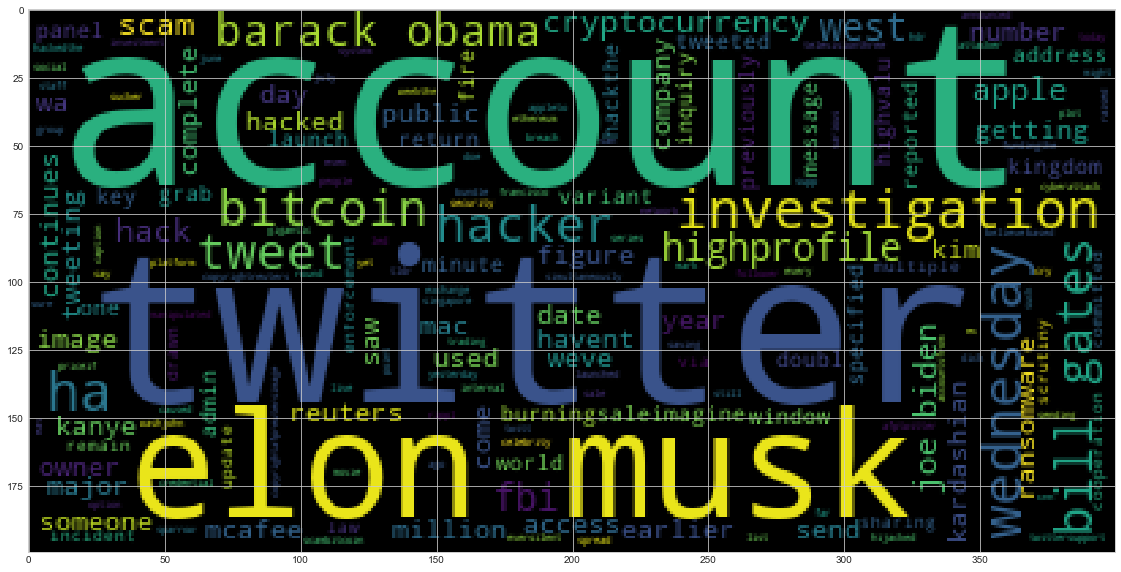

In [39]:
# Generate the Bitcoin word cloud
big_string_btc = ' '.join(corpus_btc)
input_words_btc = process_text(big_string_btc, stop)
wc = WordCloud().generate(input_words_btc)
plt.imshow(wc)

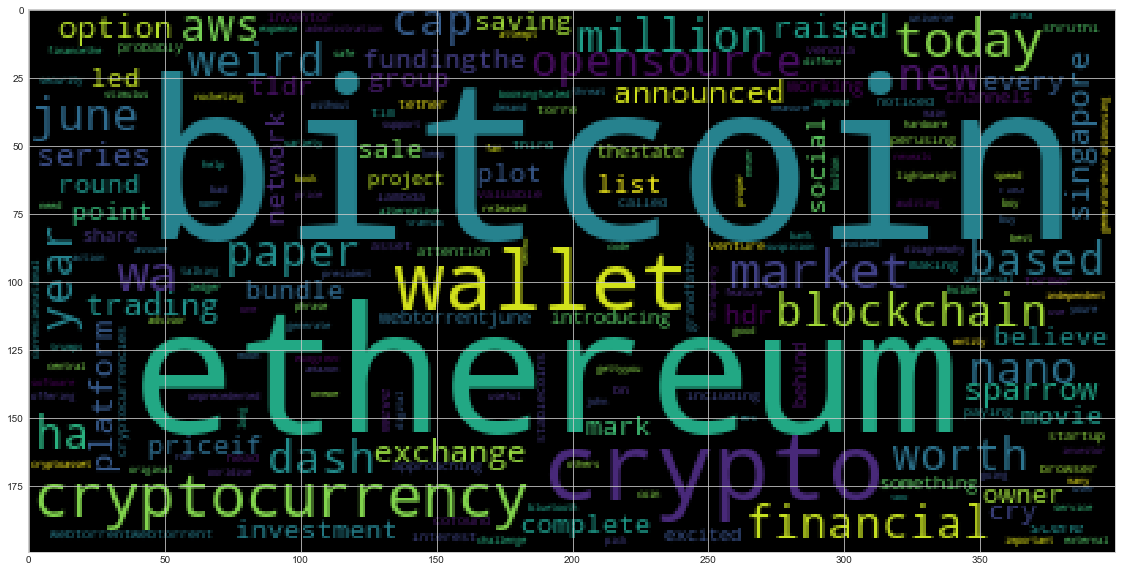

In [40]:
# Generate the Ethereum word cloud
big_string_eth = ' '.join(corpus_eth)
input_words_eth = process_text(big_string_eth, stop)
wc = WordCloud().generate(input_words_eth)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [41]:
import spacy
from spacy import displacy

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [43]:
# Concatenate all of the bitcoin text together
big_string_btc

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars] Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars] Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars] Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars] Image copyrightAFP/REUTERSImage caption\r\n Kim Kardashian West, Kanye West, Elon Musk, Bill Gates and Barack Obama were all 'hacked'\

In [44]:
# Run the NER processor on all of the text
doc = nlp(big_string_btc)

# Add a title to the document
doc.user_data["title"] = "NER of Words in Bitcoin Articles"

In [45]:
# Render the visualization
displacy.render(doc, style='ent')

In [46]:
for y in [(X.text, X.label_) for X in doc.ents]:
    print(y[0]+' '+y[1])

Twitter ORG
Bitcoin GPE
30-minute TIME
Reuters ORG
FBI ORG
FBI ORG
one CARDINAL
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
19.21 MONEY
June 25 DATE
94% PERCENT
The Social Network ORG
Mark Z PERSON
Twitters NORP
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Twitter ORG
earlier this week DATE
Sparrow Exchange ORG
Bitcoin GPE
Singapore GPE
today DATE
$3.5 million MONEY
HDR Group ORG
2020 DATE
the year DATE
John McAfee
  PERSON
Three years ago DATE
this date DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
San Francisco GPE
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
Apple ORG
Wednesday DATE
Twitter ORG
earlier this afternoon TIME
Elon Musk ORG
Twitter ORG
Wednesday evening TIME
6 pm ET TIME
Twitter ORG
Apple ORG
Mac ORG
first ORDINAL
Mac ORG
Barack Obama PERSON
Joe Biden PERSON
Elon Musk PERSON
Kanye West GPE
Apple ORG
Wednesday DATE
Twitter ORG
Barack GPE
Jo

---

## Ethereum NER

In [47]:
# Concatenate all of the ethereum text together
big_string_eth

"Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars] TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot point from the movie The Social Network, Mark Z… [+2756 chars] Introducing Web3Torrent\r\nJune 18, 2020\r\nToday were excited to share something weve been working on behind the scenes of the\r\nState Channels project: Web3Torrent.\r\nWeb3Torrent is a browser based torre… [+10464 chars] When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, com… [+4751 chars] I was perusing the crypto markets today and noticed that Tether, the grandfather of all stablecoins, is approaching a $10bn mar

In [48]:
# Run the NER processor on all of the text
doc = nlp(big_string_eth)

# Add a title to the document
doc.user_data["title"] = "NER Visualization of Words in Ethereum Articles"

In [49]:
# Render the visualization
displacy.render(doc, style='ent')

In [50]:
# List all Entities
for y in [(X.text, X.label_) for X in doc.ents]:
    print(y[0]+' '+y[1])

Sparrow Exchange ORG
Bitcoin GPE
Singapore GPE
today DATE
$3.5 million MONEY
HDR Group ORG
19.21 MONEY
June 25 DATE
94% PERCENT
The Social Network ORG
Mark Z PERSON
June 18, 2020 DATE
Today DATE
AWS Lambda ORG
Tim Wagner PERSON
Shruthi Rao PERSON
Vendia ORG
today DATE
Tether PERSON
10bn MONEY
third ORDINAL
Bitcoin GPE
third ORDINAL
one CARDINAL
BITCOIN DASH THE Bitcoin ORG
2009 DATE
CRYPTO UNIVERSE Dash PERSON
Bitcoin GPE
two CARDINAL
Bolton PERSON
Trumps PERSON
Bitcoin GPE
Bitcoin GPE
Ethereum GPE
John R. B… PERSON
Bitcoin GPE
Ethereum GPE
ERC20 ORG
The Ledger Nano X Bluetooth WORK_OF_ART
89.25 MONEY
Amazon ORG
Sigal Mandelker PERSON
U.S. Treasury ORG
2018 DATE
the Department of Justice ORG
a weird year DATE
year DATE
second ORDINAL
Nearly $60 million MONEY
June DATE
Dune Analytics ORG
Bitcoin GPE
